In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from scipy.special import inv_boxcox
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/harsh/Downloads/pgdai/adv lin reg/assignment/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Creating dataframe for numeric and categorical features separately 
numeric_df = df.select_dtypes(include=['int64', 'float64'])
categorical_df = df.select_dtypes(include=['object'])

In [7]:
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [8]:
numeric_df.shape

(1460, 38)

In [9]:
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### EDA on Numerical features

#### HeatMap

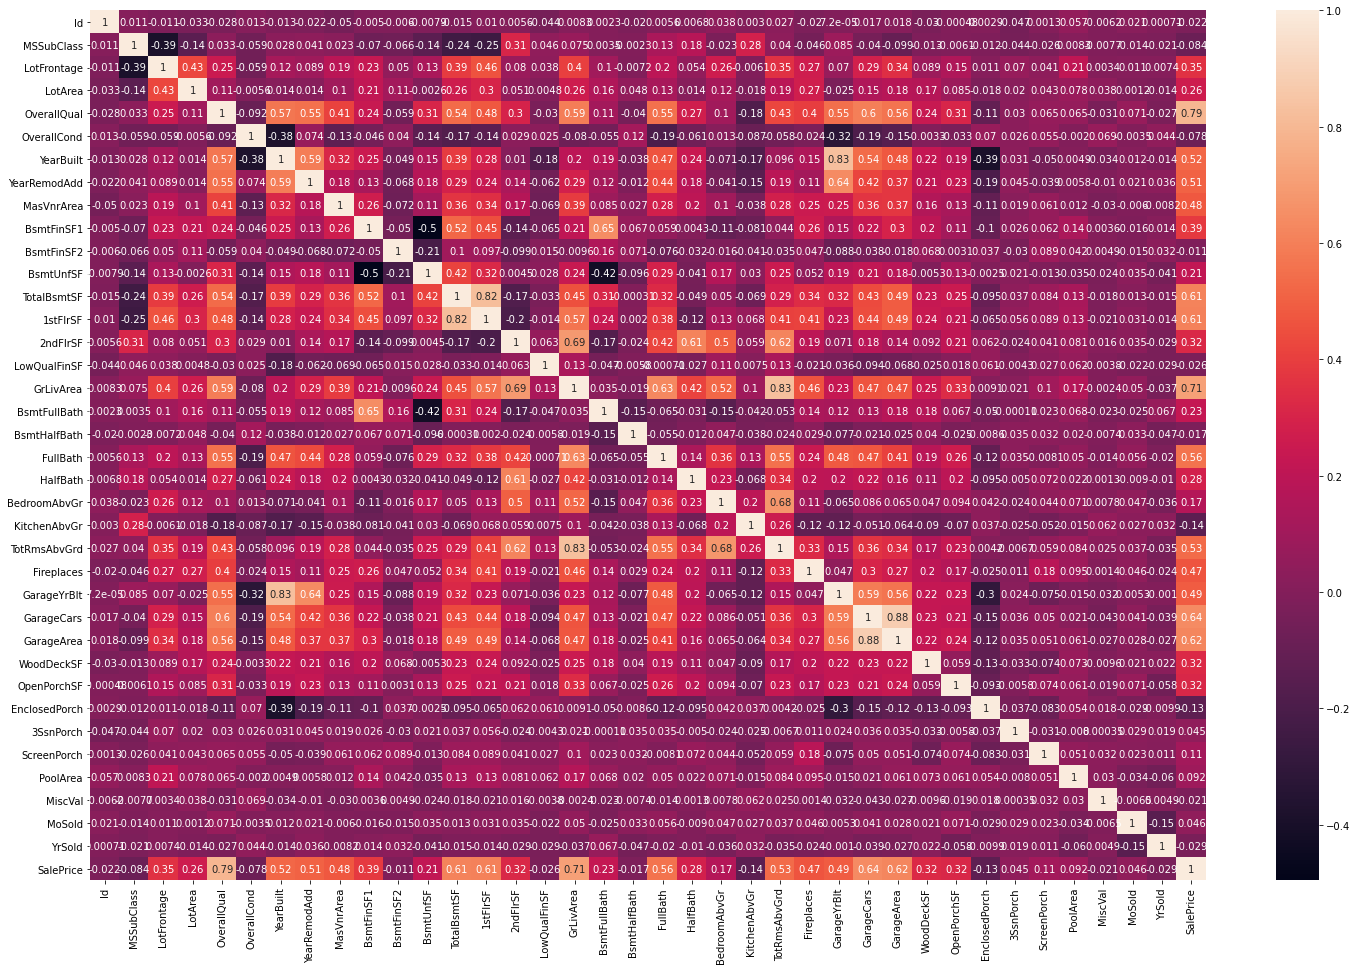

In [10]:
plt.figure(figsize=(25,16))
sns.heatmap(numeric_df.corr(),annot=True)
plt.show()

Information:
* Some features have high correlation with each other:
1. GarageCars and GarageArea (0.88)
2. GarageYrBlt and YearBuilt (0.83)
3. TotRmsAbvGrd and GrLivArea (0.83)
4. TotalBsmtSF and 1stflrSF (0.82)
5. 1stflrSF and GrLivArea (0.69)
6. TotRmsAbvGrd and BedroomAbvGrd (0.68)
* Will drop one feature from each of these pair data visualization.

#### Univariate Analysis

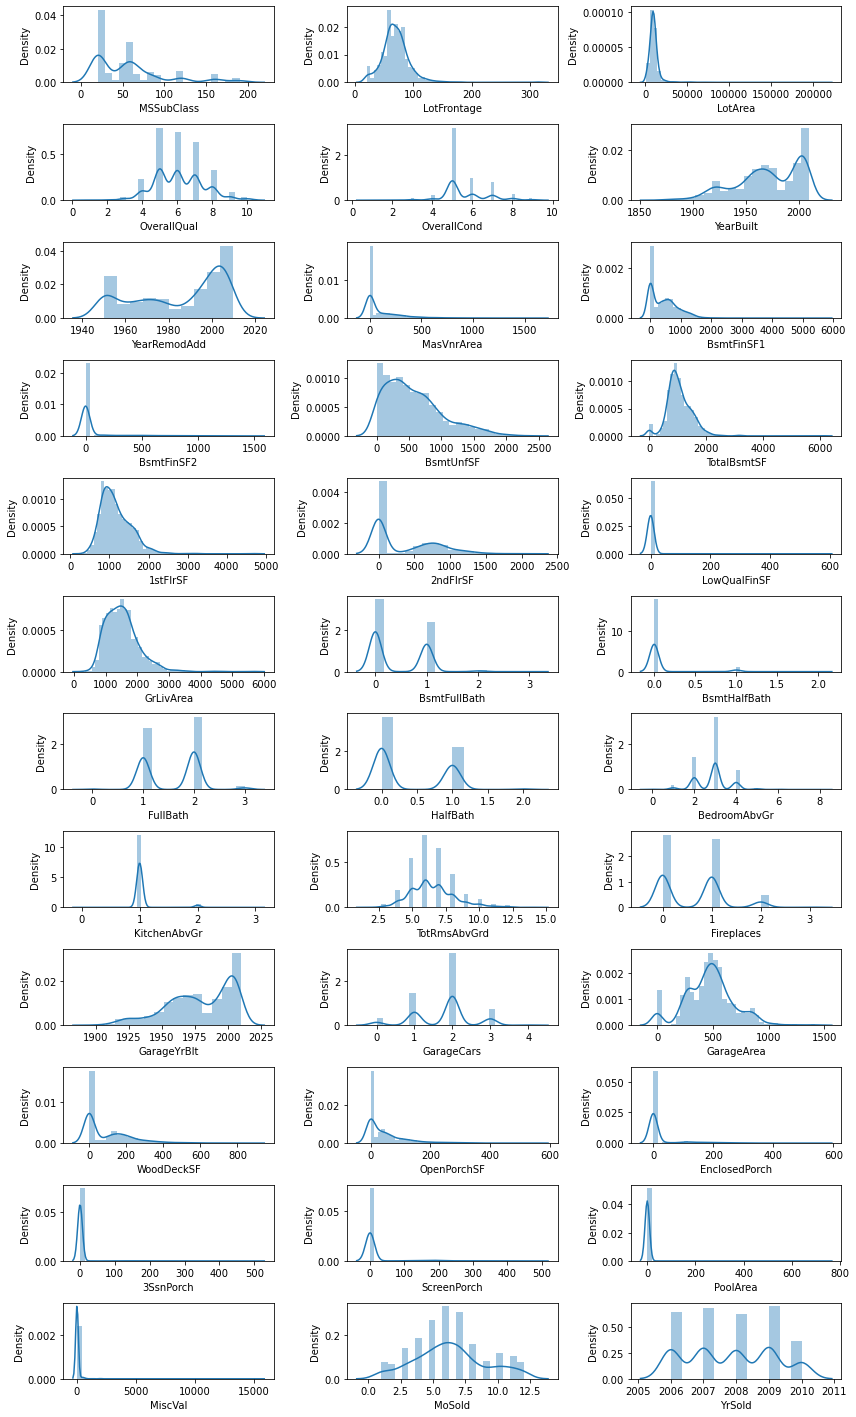

In [11]:
fig=plt.subplots(figsize=(12, 21))
i=0
for feature in numeric_df.columns:
    if feature not in ['Id', 'SalePrice']:
        i+=1
        plt.subplot(13, 3, i)
        sns.distplot(df[feature])
        plt.tight_layout()

Information:
1. 'YearBuilt', 'OverallCond', 'OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'FullBath', 'MoSold', 'Yrsold', 'BsmtQual', 'ExterCond','BsmtExposure', 'BsmtFinType2', 'TotRmsAbvGrd', 'GarageCond', 'GarageQual', 'KitchenAbvGr', 'LowQualFinSF', 'Fireplaces' are categorical.
2. Some features have majority 1 unique values: BsmtFinSF2, LowQualFinSF, KitchenAbvGr, EnclosedPorch, PoolArea, ScreenPorch, 3SsnPorch, MiscVal. These will create class imbalance so better to remove after EDA.

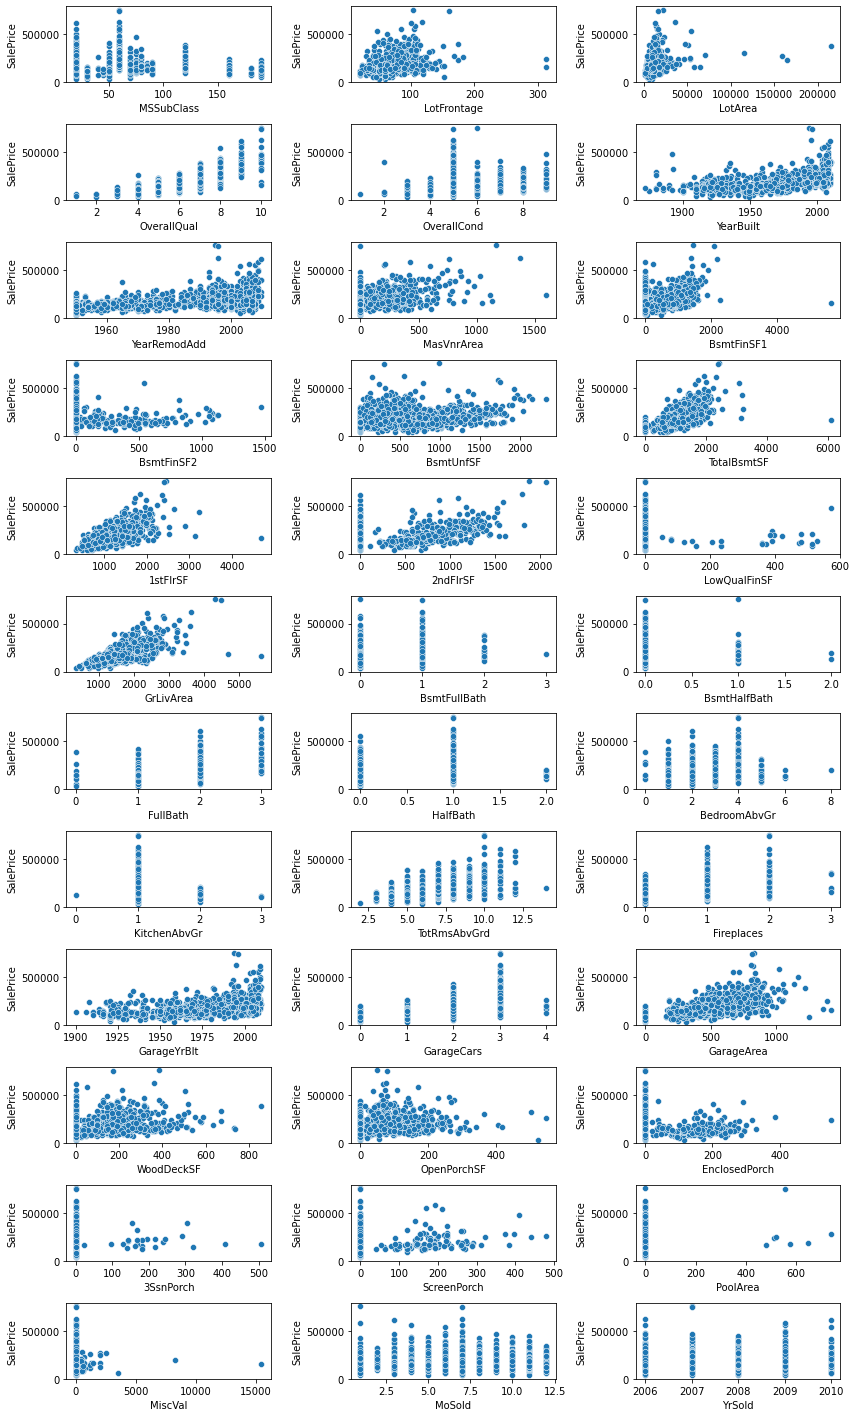

In [12]:
fig=plt.subplots(figsize=(12, 21))
i=0
for feature in numeric_df.columns:
    if feature not in ['Id', 'SalePrice']:
        i+=1
        plt.subplot(13, 3, i)
        sns.scatterplot(df[feature], df['SalePrice'])
        plt.tight_layout()

Information:
1. Mix features continuous and discrete.
2. Features like 'LotFrontage', 'LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea' are showing positive correlation with SalePrice.
3. MSSubClass, OverallQual, OverallCond, Bathroom related features, totalRoomsAbvGrd, MoSold, YrSold, GarageCars, KitchenAbvGrd has discrete values
4. Year realted features also show a positive correlation with SalePrice.

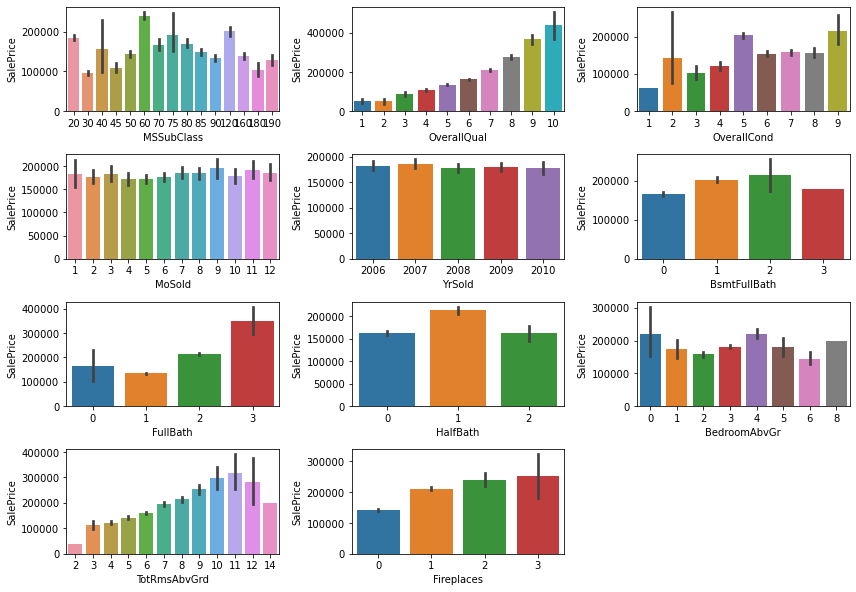

In [13]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass','OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces']):
    plt.subplot(6, 3, i+1)
    sns.barplot(df[feature], df['SalePrice'])
    plt.tight_layout()

Information:
1. 'OverallQual' : More the rating of this feature, more the SalePrice (target variable)
2. 'OverallCond' : SalePrice is highest for rating 5
3. 'MoSold' and 'YrSold': SalePrice does not show a strong trend depending on month and year on which realty is sold
4. 'FullBath' = 3 and 'HalfBath' = 1 have highest SalePrice
5. 'TotRmsAbvGrd' : More the number of total rooms above grade more the Sale Price but after a certain value it decreases.

In [14]:
# Converting the year related features into number of years
for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    df[feature] = 2022 - df[feature]

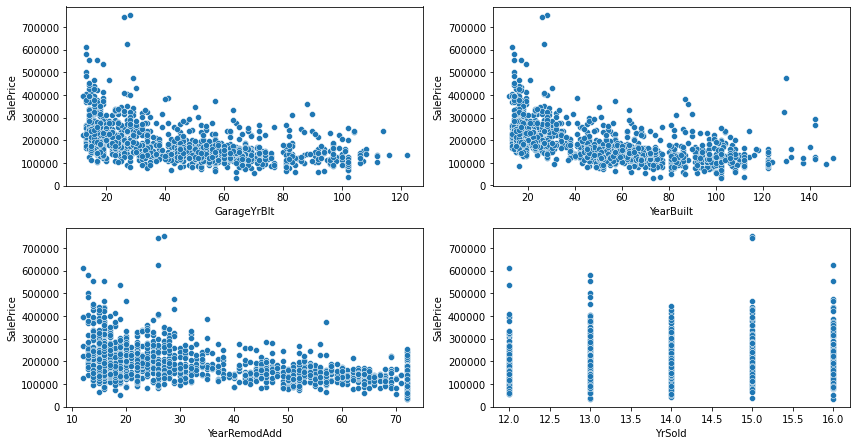

In [15]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    sns.scatterplot(df[feature], df['SalePrice'])
    plt.tight_layout()

Information:
1. For most the realty properties Garage is built within last 20-30 years, SalePrice is more for recently built garages
2. SalePrice is more for recently build houses
3. Recently remodelled houses (lower value of YearRemodAdd) have higher SalePrice
4. YrSold still does not show any significant trend

### EDA on Categorical columns

In [16]:
categorical_df.columns.sort_values()

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

In [17]:
# Dividing categorical features into sub classes
bsmt_df = categorical_df[['BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'BsmtQual']]
garage_df = categorical_df[['GarageCond','GarageFinish', 'GarageQual', 'GarageType']]
sale_df = categorical_df[['SaleCondition', 'SaleType']]
exterior_df = categorical_df[['ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd']]
heating_df = categorical_df[['Heating', 'HeatingQC','Electrical','FireplaceQu']]
land_df = categorical_df[['LandContour', 'LandSlope', 'Street', 'Alley','PavedDrive', 'Fence']]

#### Basement features

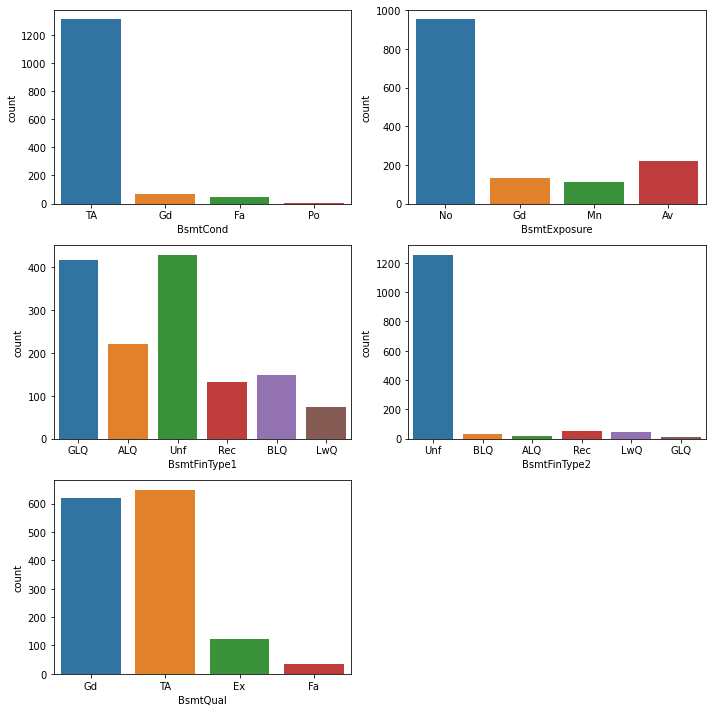

In [18]:
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(bsmt_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(bsmt_df[col])
    plt.tight_layout()

Information:
1. BsmtCond in most houses are average with no basement exposure. 
2. Most hauses have 1 Good/ unfurnished basemet with second one as unfurnished. 
3. Basement quality has been mostly equal or above average.

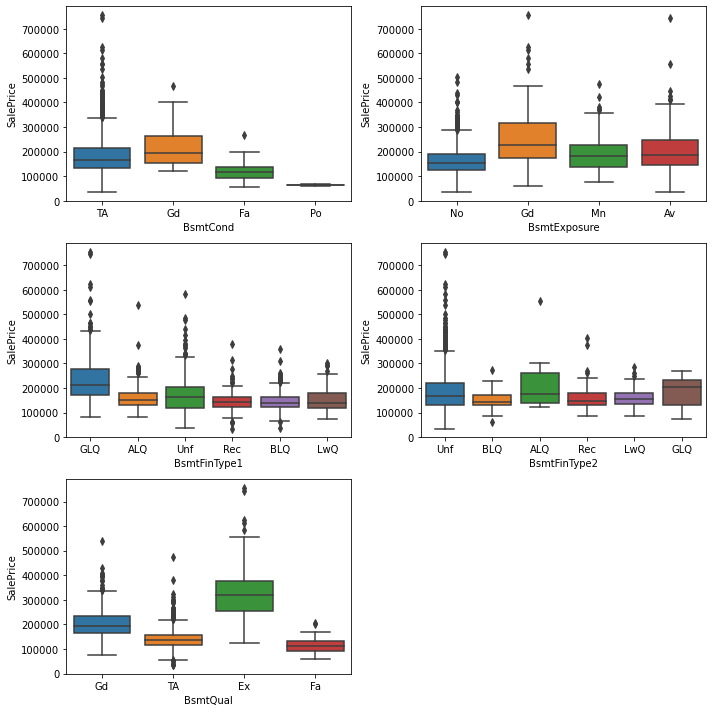

In [19]:
fig=plt.subplots(figsize=(10,10))

for i,col in enumerate(bsmt_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(bsmt_df[col], df['SalePrice'])
    plt.tight_layout()

Information:
1. Houses with good quality Bsmt Condition, Bsmt exposure, Bsmt Furnishing have high sale price . 
2. Houses with Excellent Basement height have high sale price.  

#### Garage features

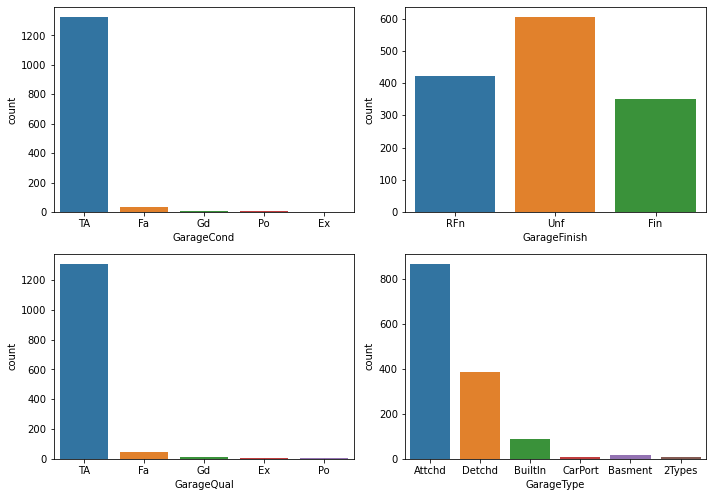

In [20]:
fig=plt.subplots(figsize=(10,10))

for i,col in enumerate(garage_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(garage_df[col])
    plt.tight_layout()

Information:
1. Garage condition, garage quality in most houses are average with unfurnished garages. 
2. Most houses have attached garage type followed by deattached.

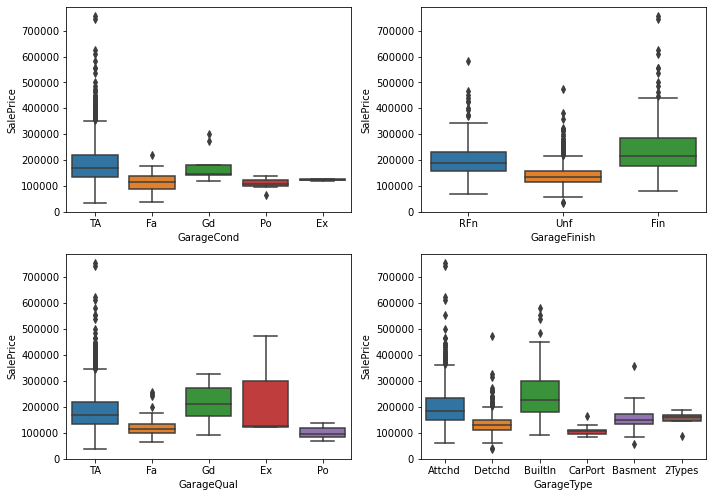

In [21]:
fig=plt.subplots(figsize=(10,10))

for i,col in enumerate(garage_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(garage_df[col], df['SalePrice'])
    plt.tight_layout()

Information:
1. Houses with good quality Bsmt Condition, Bsmt exposure, Bsmt Furnishing have high sale price . 
2. Houses with Excellent Basement height have high sale price. 

#### Sale features

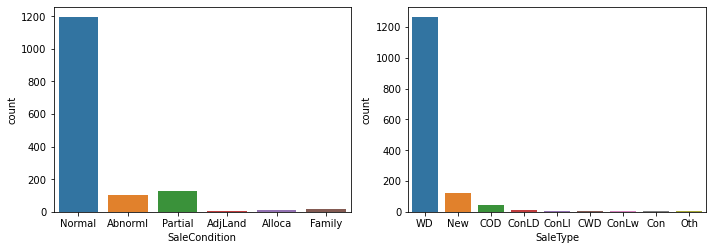

In [22]:
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(sale_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(sale_df[col])
    plt.tight_layout()

Information:
1. Mostly houses have a normal sale condition, Sale type as WD:Warranty Deed - Conventional.

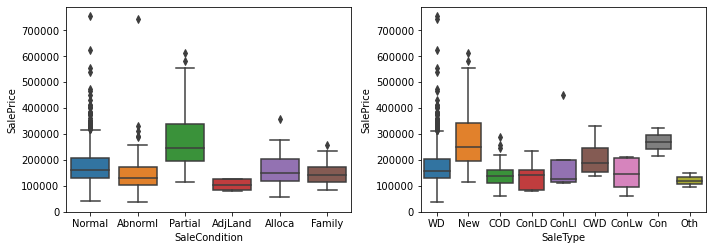

In [23]:
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(sale_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(sale_df[col], df['SalePrice'])
    plt.tight_layout()

Information:
1. Houses with Parial sale condition (new houses) and new Sale Type have high sale price.

#### Exterior features

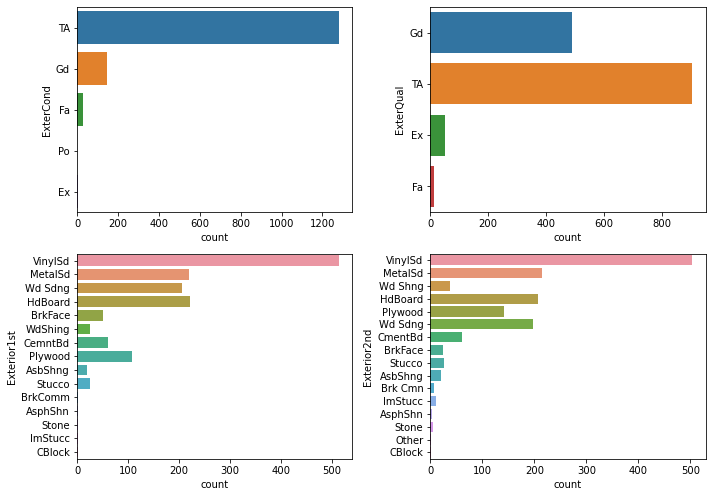

In [24]:
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(exterior_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(y=exterior_df[col])
    plt.tight_layout()

Information:
1. Most houses have average exterior conditions and quality.
2. Vinyl Siding is mostly used in houses

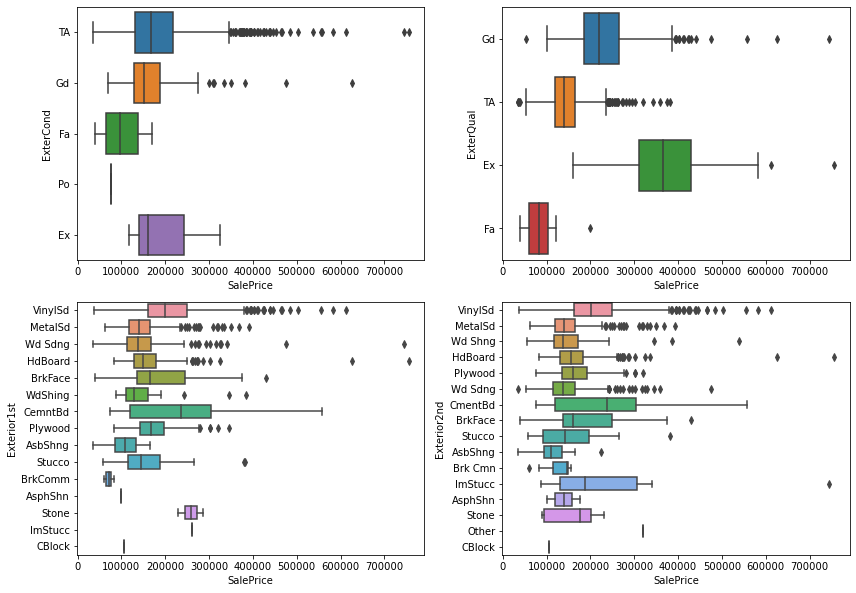

In [25]:
fig=plt.subplots(figsize=(12, 12))

for i,col in enumerate(exterior_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df['SalePrice'], exterior_df[col])
    plt.tight_layout()

Information:
1. Houses having excellent exterior conditions and quality have generally higher selling price.
2. Houses with Exterior covering made of Cement Board have high selling price.

#### Interior features

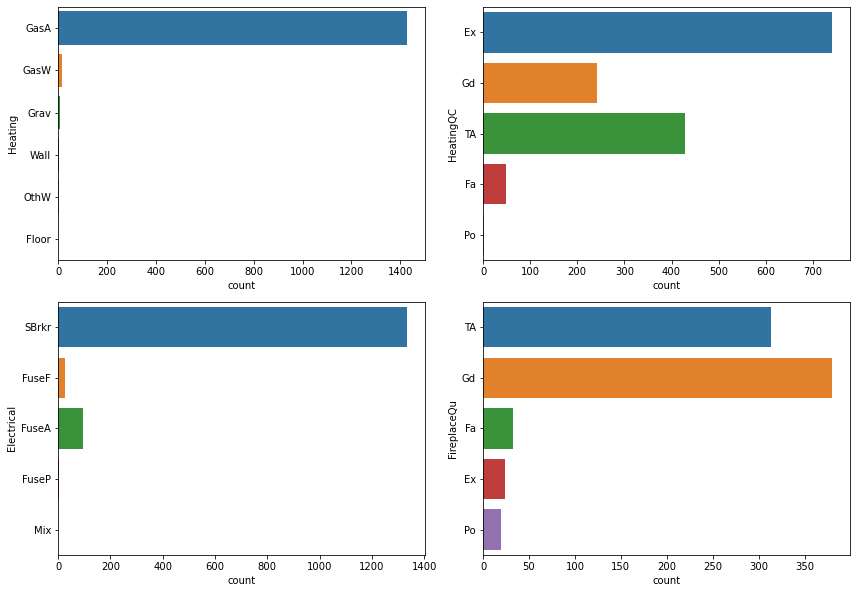

In [26]:
fig=plt.subplots(figsize=(12, 12))

for i,col in enumerate(heating_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(y = heating_df[col])
    plt.tight_layout()

Information:
1. Most houses have Gas forced warm air furnace and excellent heating quality with good fireplace.
2. Most houses have Standard Circuit Breakers.

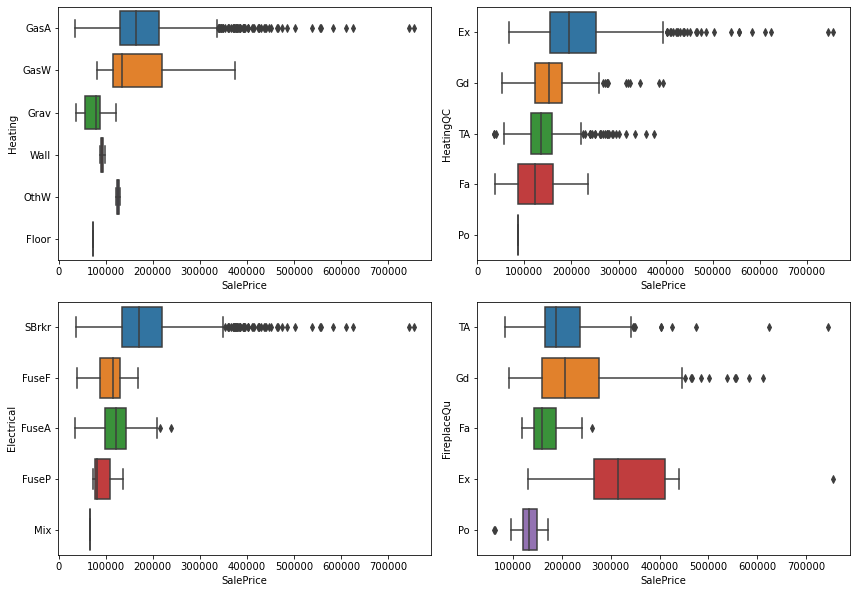

In [27]:
fig=plt.subplots(figsize=(12, 12))

for i,col in enumerate(heating_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(df['SalePrice'], heating_df[col])
    plt.tight_layout()

Information:
1. Houses having Gas hot water or steam heat and excellent heating quality have generally higher selling price.
2. Houses having Standard Circuit Breakers, good fireplace have higher selling price.

#### Land features

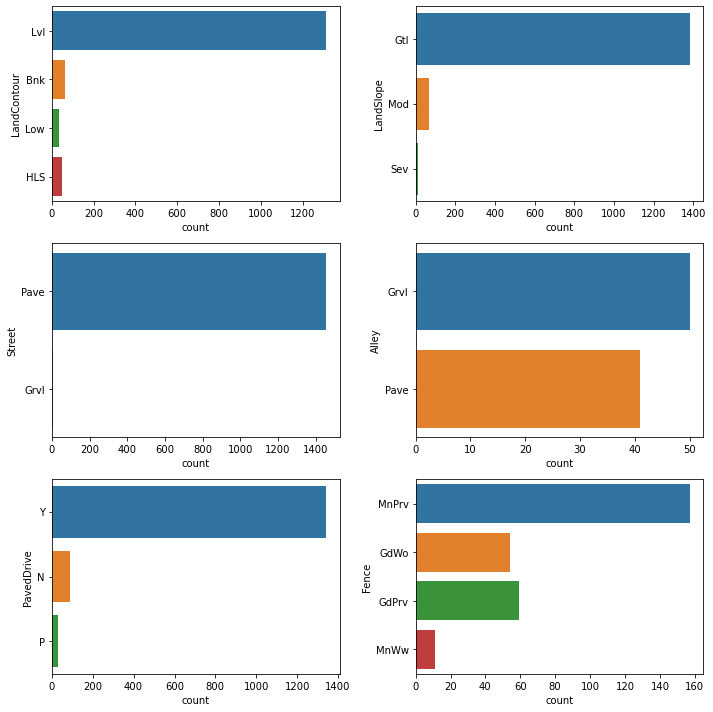

In [28]:
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(land_df.columns):
    plt.subplot(3, 2, i+1)
    sns.countplot(y = land_df[col])
    plt.tight_layout()

Information:
1. Most houses have level land contours with gentle land slope. Streets having pave are highly common.
2. Paved drive are very common. Fences with min privacy are mostly there in houses.

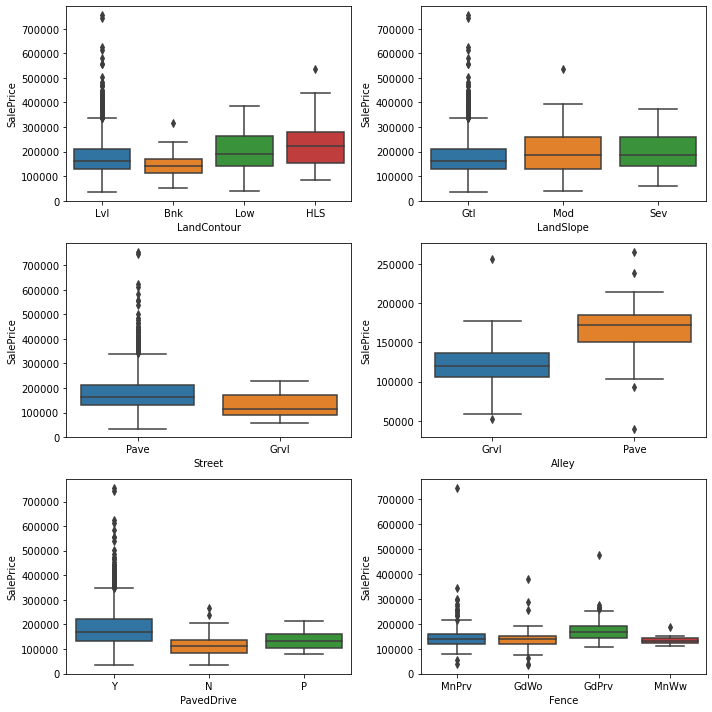

In [29]:
fig=plt.subplots(figsize=(10, 10))

for i,col in enumerate(land_df.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(land_df[col], df['SalePrice'] )
    plt.tight_layout()

Information:
1. Houses having level land contours and modelerate land slope have generally higher selling price.
2. Houses with street having pave and alley with pave have high selling price.
3. Houses having paved drive with good privacy have higher selling price.

#### Rest Features

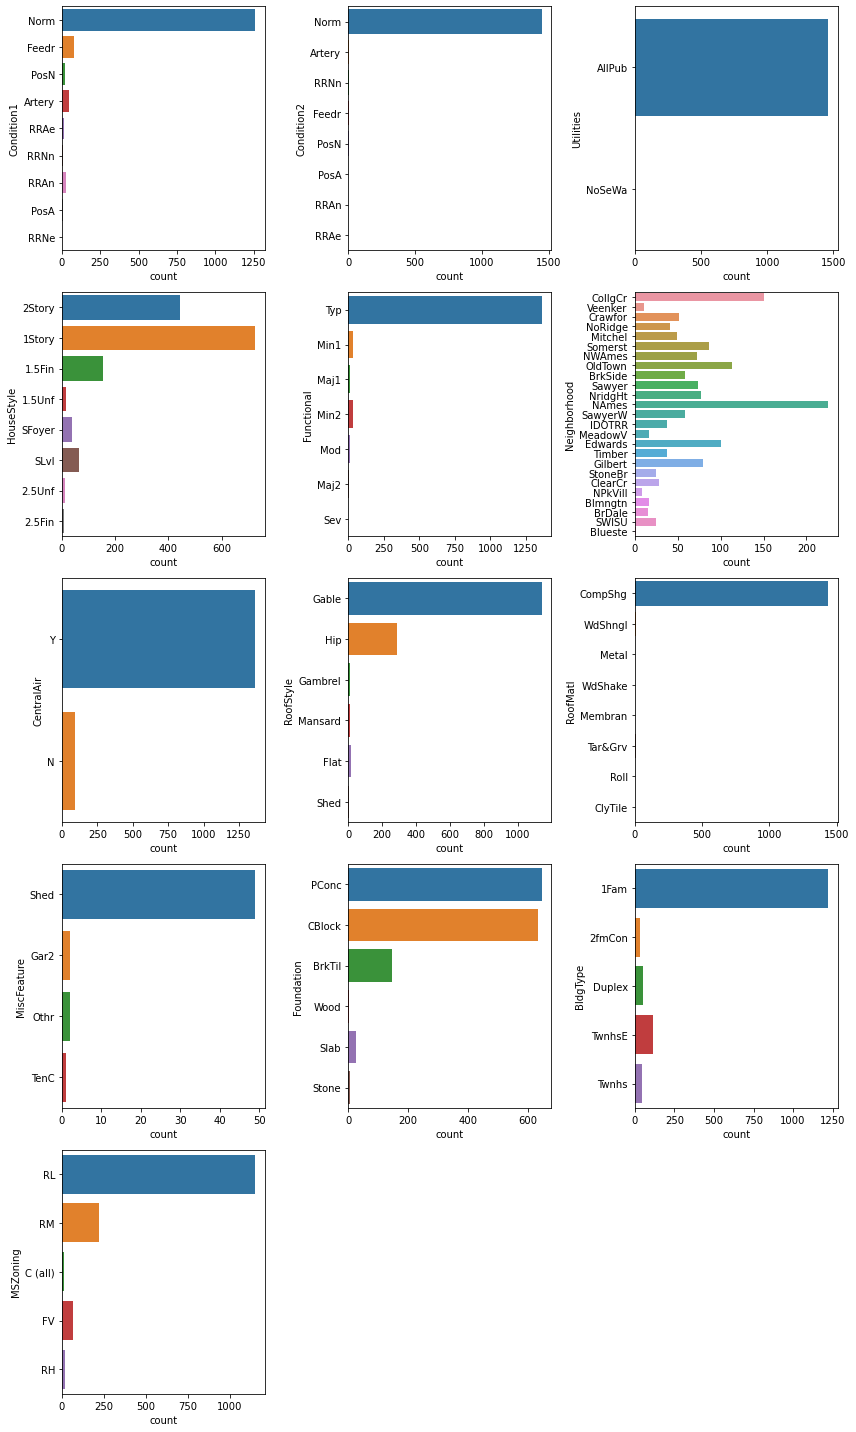

In [30]:
fig=plt.subplots(figsize=(12, 20))
feats = ['Condition1','Condition2','Utilities','HouseStyle','Functional','Neighborhood', 'CentralAir', 'RoofStyle', 'RoofMatl','MiscFeature','Foundation','BldgType','MSZoning']
for i,col in enumerate(df[feats].columns):
    plt.subplot(5, 3, i+1)
    sns.countplot(y = df[col])
    plt.tight_layout()

Information:
1. Most houses have normal conditions with All public Utilities.
2. 1 story house style are most common . Most of them have central AC. 
3. Shed is most common misc feature in houses. Gable and CompShg are most common under roof style and matterial 
4. Most homes are located near Northwest Ames and College creek.

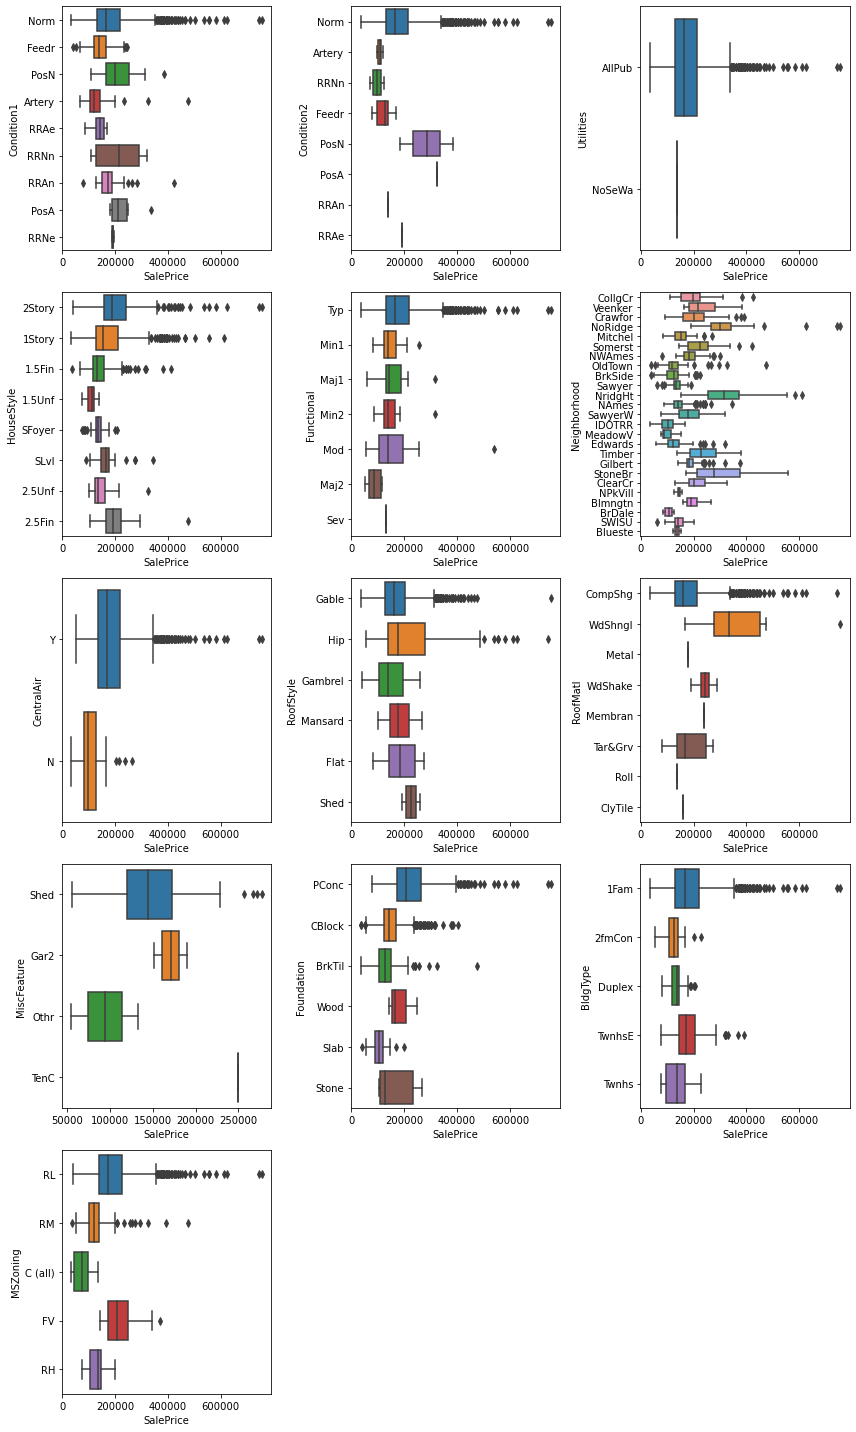

In [31]:
fig=plt.subplots(figsize=(12, 20))

for i,col in enumerate(df[feats].columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(df['SalePrice'], df[col])
    plt.tight_layout()

Information:
1. Houses having 2 Story with  have generally higher selling price.
2. Houses with central AC, hip style of roof with Wood Shingles have high selling price.
3. Houses with StoneBr, NridgHt as neighbourhood have high selling price.

### Featues selections and Handling missing values

#### Removing one of the high correlated from pairs checked using heatmap

In [32]:
df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF', 'BedroomAbvGr'], axis=1, inplace=True)
print(df.columns.shape)

(76,)


#### Removing numerical features having 1 unique value as occuring more than 95%

In [33]:
# From EDA Removing numerical features having 1 unique value as occuring more than 99%
toDrop= ['BsmtFinSF2', 'LowQualFinSF', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea','MiscVal']
for c in toDrop:
    if float(numeric_df[c].value_counts(1)[:1]) >= 0.99:
        df.drop(c, axis=1, inplace=True)
print(df.columns.shape)

(75,)


#### Checking % of missing values

In [34]:
# Checking % of null values
for feat in df.columns:
    if df[feat].isnull().any():
        print(feat, ' : ',  round(df[feat].isnull().sum()/df.shape[0], 2)*100)

LotFrontage  :  18.0
Alley  :  94.0
MasVnrType  :  1.0
MasVnrArea  :  1.0
BsmtQual  :  3.0
BsmtCond  :  3.0
BsmtExposure  :  3.0
BsmtFinType1  :  3.0
BsmtFinType2  :  3.0
Electrical  :  0.0
FireplaceQu  :  47.0
GarageType  :  6.0
GarageFinish  :  6.0
GarageQual  :  6.0
GarageCond  :  6.0
PoolQC  :  100.0
Fence  :  81.0
MiscFeature  :  96.0


In [35]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea
# Dropping Id column as it does not contribute towards predicting SalePrice
df = df[~df['MasVnrArea'].isnull()]
df.drop(['Id'], axis=1, inplace=True)

In [36]:
print(df['Electrical'].isnull().sum())

# dropping rows with null values in 'Electrical', for very low missing value count
df.dropna(subset=['Electrical'], inplace=True)

1


In [37]:
print(df['PoolQC'].value_counts())

# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
df.drop(['PoolQC'], axis=1, inplace=True)

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64


In [38]:
# Some categorical features have NAN values which denotes to a particular class.
impute_cat_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(df[impute_cat_features].isnull().sum())
for feat in impute_cat_features:
    df[feat].fillna(value='NA_' + feat, inplace = True)

Alley           1361
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      685
Fence           1170
MiscFeature     1397
dtype: int64


* 2 types of categorical features are present:
1. Encoding For Categorical Variables Ordered Features: to be label encoded: 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'

2. Unordered Features: to be one hot encoded: 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

#### Encoding Ordinal Categorical Features 

In [39]:
df['ExterQual'] = df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['ExterCond'] = df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df['BsmtQual'].map({'NA_BsmtQual':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df['BsmtCond'].map({'NA_BsmtCond':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df['BsmtExposure'].map({'NA_BsmtExposure':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA_BsmtFinType1':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA_BsmtFinType2':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['KitchenQual'] = df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df['GarageFinish'].map({'NA_GarageFinish':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df['GarageQual'].map({'NA_GarageQual':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df['GarageCond'].map({'NA_GarageCond':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['FireplaceQu'] = df['FireplaceQu'].map({'NA_FireplaceQu':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

* Information:
1. For 'Alley', Nan means 'No access to alley'
2. For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
3. For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
4. For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
5. MiscFeature - Nan means no additional features mentioned.
* All these features can be imputed by making them into one category in place of missing data.

In [40]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA_Alley,Reg,Lvl,AllPub,Inside,...,0,0,NA_Fence,NA_MiscFeature,0,2,14,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA_Alley,Reg,Lvl,AllPub,FR2,...,0,0,NA_Fence,NA_MiscFeature,0,5,15,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA_Alley,IR1,Lvl,AllPub,Inside,...,0,0,NA_Fence,NA_MiscFeature,0,9,14,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA_Alley,IR1,Lvl,AllPub,Corner,...,0,0,NA_Fence,NA_MiscFeature,0,2,16,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA_Alley,IR1,Lvl,AllPub,FR2,...,0,0,NA_Fence,NA_MiscFeature,0,12,14,WD,Normal,250000


#### One Hot Encoding on Nominal features

In [41]:
# One Hot Encoding on Nominal features
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2',
                      'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
                      'Electrical', 'GarageType','PavedDrive', 'Fence', 'MiscFeature', 'SaleType','SaleCondition','LotShape',
                      'Utilities', 'LandSlope', 'HouseStyle', 'CentralAir', 'Functional']
dummy_df = pd.get_dummies(df[unordered_features], drop_first=True)

In [42]:
dummy_df.shape

(1451, 164)

In [43]:
dummy_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA_Alley,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,CentralAir_Y,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ
0,0,0,1,0,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,0,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,1,0,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [44]:
# Dropping those classes which are present less than/equal to 1% of the observations.
dummy_cols_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.98:
        dummy_cols_drop.append(feat)
    elif dummy_df[feat].value_counts()[1]/dummy_df.shape[1] >= 0.98:
        dummy_cols_drop.append(feat)
        
print(dummy_cols_drop)
print(len(dummy_cols_drop))

['MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'Alley_NA_Alley', 'LandContour_Lvl', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_ClearCr', 'Neighborhood_MeadowV', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_SWISU', 'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Stone'

In [45]:
dummy_df.drop(columns = dummy_cols_drop, axis = 1, inplace = True)
dummy_df.shape

(1451, 47)

In [46]:
# Adding the dummy variables to the original dataframe
df = pd.concat([df,dummy_df],axis=1)

# Dropping the redundant columns
df = df.drop(unordered_features,axis=1)

In [47]:
df.shape

(1451, 91)

In [48]:
X = df.drop('SalePrice', axis = 1)

In [49]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
0,60,65.0,8450,7,5,19,19,196.0,3,2,...,0,0,0,0,0,0,0,0,0,0
1,20,80.0,9600,6,8,46,46,0.0,2,2,...,0,0,0,0,0,0,0,0,0,0
2,60,68.0,11250,7,5,21,20,162.0,3,2,...,0,0,0,0,0,0,0,0,0,0
3,70,60.0,9550,7,5,107,52,0.0,2,2,...,0,0,0,0,0,0,0,0,0,0
4,60,84.0,14260,8,5,22,22,350.0,3,2,...,0,0,0,0,0,0,0,0,0,0


In [50]:
y = df['SalePrice']
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

1.8831110462405252


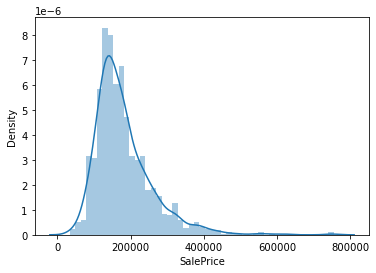

In [51]:
sns.distplot(y)
print(y.skew())

#### Log transformation to removing skewness

In [52]:
y_bc = np.log(y)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

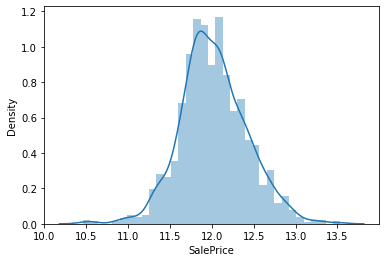

In [53]:
sns.distplot(np.log(y))

#### Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y_bc, test_size = 0.2, shuffle = True, random_state=100)

In [55]:
X_train.shape

(1160, 90)

In [56]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
624,60,80.0,10400,6,5,50,50,288.0,2,2,...,0,0,0,0,0,0,0,0,0,1
592,20,60.0,6600,5,8,40,19,0.0,2,3,...,0,0,0,0,0,0,0,0,0,0
48,190,33.0,4456,4,5,102,14,0.0,2,2,...,0,0,1,1,0,0,0,0,0,0
1070,20,72.0,10152,5,5,66,66,120.0,2,2,...,0,0,0,0,0,0,0,0,0,0
1234,70,55.0,8525,5,6,111,72,0.0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [57]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
624,60,80.0,10400,6,5,50,50,288.0,2,2,...,0,0,0,0,0,0,0,0,0,1
592,20,60.0,6600,5,8,40,19,0.0,2,3,...,0,0,0,0,0,0,0,0,0,0
48,190,33.0,4456,4,5,102,14,0.0,2,2,...,0,0,1,1,0,0,0,0,0,0
1070,20,72.0,10152,5,5,66,66,120.0,2,2,...,0,0,0,0,0,0,0,0,0,0
1234,70,55.0,8525,5,6,111,72,0.0,2,2,...,0,0,0,0,0,0,0,0,0,0


#### Outlier Treatment

In [58]:
# Checking presence of outliers
outliers_percentage={}
numeric_df = X_train.select_dtypes(include=['int64', 'float64'])
cols = ['SalePrice','YearBuilt','OverallCond', 'OverallQual', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 
           'FullBath', 'MoSold', 'Yrsold', 'BsmtQual', 'ExterCond','BsmtExposure', 'BsmtFinType2','BsmtCond',
            'TotRmsAbvGrd','GarageCond','GarageQual', 'KitchenAbvGr', 'LowQualFinSF','Fireplaces']
for feature in numeric_df.columns:
    if feature not in cols:
        IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
        outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
        outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)

outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)


,Features,Percentage
19,EnclosedPorch,14.48
8,BsmtFinSF2,11.47
21,ScreenPorch,8.19
0,MSSubClass,7.16
4,MasVnrArea,6.55
1,LotFrontage,5.78
18,OpenPorchSF,5.34
2,LotArea,4.74
22,MiscVal,3.88
17,WoodDeckSF,1.81


In [59]:
# Outlier Treatment
for feature, percent in outliers_percentage.items():
    if percent > 0:
        IQR = X_train[feature].quantile(.75) - X_train[feature].quantile(.25) 
        max_value = X_train[feature].quantile(.75)+1.5*IQR
        min_value = X_train[feature].quantile(.25)-1.5*IQR
        print(feature, IQR, min_value, max_value)
        X_train[feature][X_train[feature] > max_value] = max_value
        X_train[feature][X_train[feature] < min_value ] = min_value
        X_test[feature][X_test[feature] > max_value] = max_value
        X_test[feature][X_test[feature] < min_value ] = min_value

MSSubClass 50.0 -55.0 145.0
LotFrontage 21.0 27.5 111.5
LotArea 4088.0 1368.0 17720.0
MasVnrArea 169.0 -253.5 422.5
BsmtFinSF1 705.25 -1057.875 1763.125
BsmtFinSF2 0.0 0.0 0.0
BsmtUnfSF 589.5 -657.75 1700.25
1stFlrSF 509.0 118.5 2154.5
2ndFlrSF 729.25 -1093.875 1823.125
GarageArea 240.0 -24.0 936.0
WoodDeckSF 168.0 -252.0 420.0
OpenPorchSF 70.0 -105.0 175.0
EnclosedPorch 0.0 0.0 0.0
3SsnPorch 0.0 0.0 0.0
ScreenPorch 0.0 0.0 0.0
MiscVal 0.0 0.0 0.0


Information:
1. Many features have outliers
2. Dropping all the outliers will cause loss of information.
3. Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 IQR, 75th percentile + 1.5 IQR]
4. IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
5. Target column 'SalePrice' is excluded in this. Some other features are also excluded since those are ordered categorical type which are labelled encoded to numeric form.

In [60]:
#  Checking Null values
def null_values(dataf):
    for feat in dataf.columns:
        if dataf[feat].isnull().any():
            print(feat+" : "+str(dataf[feat].isnull().sum()))

In [61]:
null_values(X_train)
print("-----------")
null_values(X_test)

LotFrontage : 204
-----------
LotFrontage : 53


In [62]:
X_train['LotFrontage'].dtype

dtype('float64')

In [63]:
# Imputing missing values with mean of train data since outliers are already removed. 
imputed_value = np.mean(X_train['LotFrontage'])
print("Mean : ",imputed_value)
X_train['LotFrontage'].fillna(imputed_value, inplace = True)
X_test['LotFrontage'].fillna(imputed_value, inplace = True)

Mean :  69.043410041841


In [64]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
624,60,80.0,10400,6,5,50,50,288.0,2,2,...,0,0,0,0,0,0,0,0,0,1
592,20,60.0,6600,5,8,40,19,0.0,2,3,...,0,0,0,0,0,0,0,0,0,0
48,145,33.0,4456,4,5,102,14,0.0,2,2,...,0,0,1,1,0,0,0,0,0,0
1070,20,72.0,10152,5,5,66,66,120.0,2,2,...,0,0,0,0,0,0,0,0,0,0
1234,70,55.0,8525,5,6,111,72,0.0,2,2,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,Fence_MnPrv,MiscFeature_Shed,SaleType_New,SaleCondition_Partial,LotShape_IR2,LandSlope_Mod,HouseStyle_SFoyer,HouseStyle_SLvl,Functional_Min1,Functional_Min2
357,120,44.00000,4224,5,5,46,46,0.0,2,2,...,1,0,0,0,0,0,0,0,0,0
824,20,81.00000,11216,8,5,16,16,0.0,3,2,...,0,0,1,1,0,0,0,0,0,0
369,20,69.04341,9830,5,7,63,16,0.0,2,3,...,0,0,0,0,0,0,0,0,0,0
291,145,55.00000,5687,5,6,110,22,0.0,2,1,...,0,0,0,0,0,0,0,0,0,0
134,20,78.00000,10335,5,6,54,29,0.0,2,2,...,1,0,0,0,0,0,0,0,1,0


#### Scaling

In [66]:
sscaler = StandardScaler()
sscaler.fit(X_train)
X_train_sc = pd.DataFrame(data=sscaler.transform(X_train), columns=X_train.columns)
X_test_sc = pd.DataFrame(data=sscaler.transform(X_test), columns=X_test.columns)

In [67]:
# Folds for GridSearchCV
folds = KFold(n_splits = 4)

### Modelling, hyperparams tuning for ridge and lasso, evalution 

In [68]:
def ModelTrainAndEvaluaion(model, params):
    model_cv = GridSearchCV(estimator = model, 
                              param_grid = params, 
                              scoring= 'r2', 
                              cv = folds, 
                              return_train_score=True,
                              verbose = 1)            
    model_cv.fit(X_train_sc, y_train)
    alpha = model_cv.best_params_["alpha"]
    print("Optimum alpha for %s is %f" %(model, alpha))
    final_model = model_cv.best_estimator_

    final_model.fit(X_train_sc, y_train)
    y_train_pred = final_model.predict(X_train_sc)
    y_test_pred = final_model.predict(X_test_sc)
    
    # Model Evaluation
    print('R2 score (train) : ',round(r2_score(y_train,y_train_pred),4))
    print('R2 score (test) : ',round(r2_score(y_test,y_test_pred),4))
    print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
    print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
    fig, axes = plt.subplots(1, 3, figsize=(15,3))
    fig.suptitle('Assumtions of Linear Regression')
    sns.distplot(y_train -  y_train_pred, ax = axes[0])
    axes[0].set_title('Distribution of Residuals')
    sns.scatterplot(y_train_pred ,y_train, ax = axes[1])  
    axes[1].set_title('Plot of y vs y_predicted')
    sns.scatterplot(X_train.index, y_train-y_train_pred, ax = axes[2])
    axes[2].set_title('Homoscedasticity/ Variance')
    plt.tight_layout()
    
    cv_results = pd.DataFrame(model_cv.cv_results_)
    # plotting mean test and train scores with alpha 
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

    # plotting
    fig = plt.figure(figsize=(7,3))
    plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
    plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
    plt.xlabel('alpha')
    plt.ylabel('r2')

    plt.title("r2 and alpha")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()
    return final_model

Fitting 4 folds for each of 29 candidates, totalling 116 fits
Optimum alpha for Ridge() is 30.000000
R2 score (train) :  0.9095
R2 score (test) :  0.8896
RMSE (train) :  0.1202
RMSE (test) :  0.1324


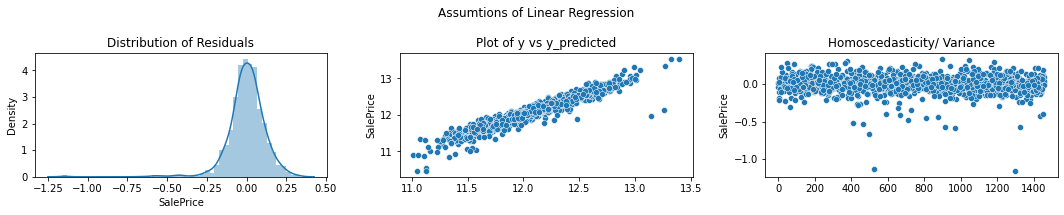

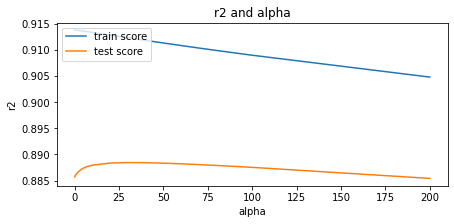

In [69]:
params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                        9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100,200]}
ridge = ModelTrainAndEvaluaion(Ridge(), params)

In [70]:
# Satisfying all the assumption of Linear Regression

Fitting 4 folds for each of 11 candidates, totalling 44 fits
Optimum alpha for Lasso() is 0.001250
R2 score (train) :  0.9092
R2 score (test) :  0.8923
RMSE (train) :  0.1204
RMSE (test) :  0.1308


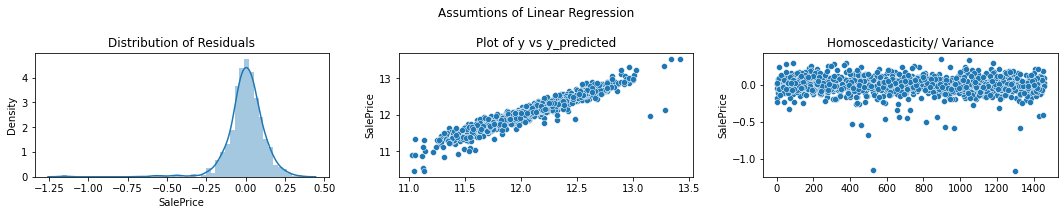

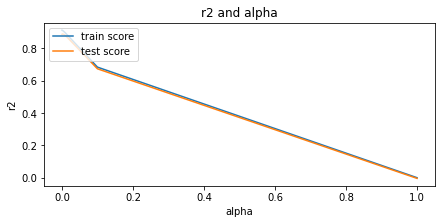

In [71]:
params = {'alpha': [0.0001, 0.00025,  0.0005, 0.00065, 0.001, 0.00125, 0.0025,0.005, 0.01, 0.1, 1]}
lasso = ModelTrainAndEvaluaion(Lasso(), params)

In [72]:
# Satisfying all the assumption of Linear Regression

### Comparing Model Coefficients

In [73]:
model_coefficients = pd.DataFrame(index=X_test_sc.columns)
model_coefficients.rows = X_test_sc.columns

model_coefficients['Ridge'] = ridge.coef_
model_coefficients['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
print(len(model_coefficients))
model_coefficients

90


,Ridge,Lasso
MSSubClass,0.000993,-0.000124
LotFrontage,0.009745,0.008043
LotArea,0.024791,0.025604
OverallQual,0.073725,0.079334
OverallCond,0.047315,0.048048
YearBuilt,-0.047820,-0.054254
YearRemodAdd,-0.016957,-0.015383
MasVnrArea,0.000812,0.000000
ExterQual,0.007551,0.005310
ExterCond,-0.000916,-0.000000


### Final Model 

In [74]:
# Features for final model. Choosing Lasso since it gives better r2 score and less RMSE.
print("Total no of features : ", model_coefficients[model_coefficients['Lasso']!=0][['Lasso']].shape[0])
model_coef = model_coefficients[model_coefficients['Lasso']!=0][['Lasso']].sort_values(by='Lasso', ascending=False, key=abs)
model_coef

Total no of features :  66


,Lasso
1stFlrSF,0.100798
2ndFlrSF,0.088418
OverallQual,0.079334
YearBuilt,-0.054254
OverallCond,0.048048
BsmtFinSF1,0.043631
LotArea,0.025604
GarageArea,0.024940
Neighborhood_NridgHt,0.021129
Neighborhood_IDOTRR,-0.020536


In [75]:
# Top 10 features
TOP_10 = model_coef[:10]
TOP_10

,Lasso
1stFlrSF,0.100798
2ndFlrSF,0.088418
OverallQual,0.079334
YearBuilt,-0.054254
OverallCond,0.048048
BsmtFinSF1,0.043631
LotArea,0.025604
GarageArea,0.024940
Neighborhood_NridgHt,0.021129
Neighborhood_IDOTRR,-0.020536


In [76]:
# Predicted values of Dependent feature (Sale Price)
y_prediction = lasso.predict(X_test_sc)
y_test_pred_invbc = np.exp(y_prediction)
y_test_pred_invbc[:5]

array([136726.84139572, 239633.76112556, 168268.73686388, 121071.38619848,
       173567.0961065 ])

## Subjective Questions

#### Model Building with doubling the value of lambda

In [77]:
# Model Building
ridge_model = Ridge(alpha=60)
ridge_model.fit(X_train_sc, y_train)

# Predicting
y_train_pred = ridge_model.predict(X_train_sc)
y_test_pred = ridge_model.predict(X_test_sc)

print("Model Evaluation :")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation :
R2 score (train) :  0.9085
R2 score (test) :  0.8897
RMSE (train) :  0.1209
RMSE (test) :  0.1324


In [78]:
# Model Building
lasso_model = Lasso(alpha=0.0025)
lasso_model.fit(X_train_sc, y_train)

# Predicting
y_train_pred = lasso_model.predict(X_train_sc)
y_test_pred = lasso_model.predict(X_test_sc)

print("Model Evaluation :")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation :
R2 score (train) :  0.9077
R2 score (test) :  0.8934
RMSE (train) :  0.1214
RMSE (test) :  0.1301


In [79]:
model_coefficients = pd.DataFrame(index=X_test_sc.columns)
model_coefficients.rows = X_test_sc.columns

model_coefficients['Ridge_double'] = ridge_model.coef_
model_coefficients['Lasso_double'] = lasso_model.coef_
model_coefficients['Ridge'] = ridge.coef_
model_coefficients['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)


In [80]:
model_coef = model_coefficients[model_coefficients['Lasso']!=0].sort_values(by='Lasso', ascending=False, key=abs)
model_coef

,Ridge_double,Lasso_double,Ridge,Lasso
1stFlrSF,0.077597,0.102589,0.085522,0.100798
2ndFlrSF,0.062941,0.085305,0.074293,0.088418
OverallQual,0.071763,0.082637,0.073725,0.079334
YearBuilt,-0.040884,-0.050998,-0.047820,-0.054254
OverallCond,0.044493,0.045381,0.047315,0.048048
BsmtFinSF1,0.042298,0.037263,0.045736,0.043631
LotArea,0.025064,0.027845,0.024791,0.025604
GarageArea,0.026128,0.027144,0.025054,0.024940
Neighborhood_NridgHt,0.020874,0.018371,0.021887,0.021129
Neighborhood_IDOTRR,-0.022803,-0.019529,-0.022610,-0.020536


In [81]:
# Top 5 featues 
model_coef[:5]

,Ridge_double,Lasso_double,Ridge,Lasso
1stFlrSF,0.077597,0.102589,0.085522,0.100798
2ndFlrSF,0.062941,0.085305,0.074293,0.088418
OverallQual,0.071763,0.082637,0.073725,0.079334
YearBuilt,-0.040884,-0.050998,-0.047820,-0.054254
OverallCond,0.044493,0.045381,0.047315,0.048048


#### Removing top 5 features

In [82]:
# Model Building
X_train_r = X_train_sc.drop(['1stFlrSF','2ndFlrSF','OverallQual','YearBuilt','OverallCond'], axis = 1)
X_test_r = X_test_sc.drop(['1stFlrSF','2ndFlrSF','OverallQual','YearBuilt','OverallCond'], axis = 1)

lasso_model = Lasso(alpha=0.00125)
lasso_model.fit(X_train_r, y_train)

# Predicting
y_train_pred = lasso_model.predict(X_train_r)
y_test_pred = lasso_model.predict(X_test_r)

print("Model Evaluation :")
print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))
print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

Model Evaluation :
R2 score (train) :  0.8753
R2 score (test) :  0.8521
RMSE (train) :  0.1411
RMSE (test) :  0.1533


In [83]:
model_coefficients_r = pd.DataFrame(index=X_test_r.columns)
model_coefficients_r.rows = X_test_r.columns
model_coefficients_r['Lasso_R'] = lasso_model.coef_

In [84]:
model_coefficients_r.sort_values(by='Lasso_R', ascending=False, key=abs )[:5]

,Lasso_R
BsmtFinSF1,0.080068
TotRmsAbvGrd,0.063999
FullBath,0.050427
BsmtUnfSF,0.049131
GarageArea,0.041554
